In [ ]:
import numpy as np
import math
import random

In [ ]:
def kernel(x,y):
    return np.exp((-(x-y)**2)/2)

In [ ]:
def computeMMD(x, y, N):
    # Convert x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    Kxx = kernel(x[:, None], x[None, :])  # Kernel matrix for x with itself
    Kyy = kernel(y[:, None], y[None, :])  # Kernel matrix for y with itself
    Kxy = kernel(x[:, None], y[None, :])  # Kernel matrix for x with y

    # Calculate the MMD using vectorized operations
    MMD_squared = (np.sum(Kxx) + np.sum(Kyy) - 2 * np.sum(Kxy)) / (N**2)

    return np.sqrt(MMD_squared)

In [ ]:
def update(x, y, n):
    # Convert x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)

    # Calculate the last element in x and y
    xn1 = x[n-1]
    yn1 = y[n-1]

    # Compute kernels for all elements with the last element
    kernel_xn1 = kernel(x[:n], xn1)  # Kernel values between all elements in x and xn1
    kernel_yn1 = kernel(y[:n], yn1)  # Kernel values between all elements in y and yn1
    kernel_xyn1 = kernel(x[:n], yn1)  # Kernel values between all elements in x and yn1

    # Sum the results for the first part
    sum1 = np.sum(kernel_xn1 + kernel_yn1 - 2 * kernel_xyn1)

    # Compute kernels for the last element in x and y with all elements up to n-1
    kernel_xn1_m = kernel(xn1, x[:n-1])  # Kernel values between xn1 and all elements in x[:n-1]
    kernel_yn1_m = kernel(yn1, y[:n-1])  # Kernel values between yn1 and all elements in y[:n-1]
    kernel_xyn1_m = kernel(xn1, y[:n-1])  # Kernel values between xn1 and all elements in y[:n-1]

    # Sum the results for the second part
    sum2 = np.sum(kernel_xn1_m + kernel_yn1_m - 2 * kernel_xyn1_m)

    # Calculate the final result
    result = (sum1 + sum2) / (n**2)

    return result


In [ ]:
###########     Algorithm 1 KMED-SEQ: Clustering when K is known S    #########

M = 4  # total no of streams
K = 2   # no of clusters
#Mk = 5  # no of streams per cluster
correct = [[0,1],[2,3]]
print(correct)

[[0, 1], [2, 3]]


In [ ]:
import math
constvec = [1.5,2,2.5,3,3.5,4,4.5,5,5.5,6]
Pe = np.zeros(len(constvec))
lnPe=np.zeros(len(constvec))
expsamples=np.zeros(len(constvec))
# print(Pe,lnPe,expsamples)

for ii in range(len(constvec)):
    const = constvec[ii]
    iter_sum = 0
    error = 0
    total = 0
    while error < 1:
        ##############  INITIALISATION  ################
        # cluster indices 0 to M-1 and an empty list lst
        clusters = [[i] for i in range(M)]
        lst = [[] for i in range(M)]

        nn = 2
        p = 0.5
        # for j in range(M):
        k = np.random.binomial(1,p,1)
        # print("the value of K is :",k)
        sample_1 = ((1 - k) ) * np.random.normal(0, 1, nn) + (k) * np.random.normal(0.5, 1, nn)
        k = np.random.binomial(1,p,1)
        sample_2 = ((1 - k)) * np.random.normal(0.5, 1, nn) + (k ) * np.random.normal(1, 1,nn)
        k = np.random.binomial(1,p,1)
        sample_3 = ((1 - k)) * np.random.normal(2, 1, nn) + (k ) * np.random.normal(2.5, 1, nn)
        k = np.random.binomial(1,p,1)
        sample_4 = ((1 - k) ) * np.random.normal(2.5, 1, nn) + (k) * np.random.normal(3, 1, nn)
        X = np.asarray((sample_1, sample_2, sample_3, sample_4))
        # print("the value od the X is :",X)

        # # generate first 2 samples to initialize MMD estimate
        # nn = 2
        # X = np.asarray([np.random.normal(means[j],1,nn) for j in range(M) ])

        ####    Calculating initial MMDs between each pair of sequences    ####

        lst_dseq =np.zeros((M,M))
        for i in range(1,M):
            for j in range(i):
                lst_dseq[i][j] = computeMMD(X[i,:],X[j,:],nn)
                lst_dseq[j][i] = lst_dseq[i][j]
        #print(lst_fixed)

        ##### TEST-STATISTIC Tn INITIALISATION #####
        Tn = 0
        #print(np.min(lst_index,axis = 0))               #it will a column matrix of all 0
        #print(np.min(lst_index,axis = 1))                #it will a row matrix of all 0

        #minval = np.min(lst_fixed[np.nonzero(lst_fixed)])         #will give you the non zero min value of the matrix
        #print(minval)

        #[min_i,min_j] = np.where(lst_fixed==minval)       #will give the index of the  min value of the matrix
        #print([min_i,min_j])

        #Tn = minval    #minimum inter-cluster distance
        # print("Tn is ", Tn)
        # print("threshold is ",const/(nn**0.5))
        # print("computer till here ")
        while Tn < (const/(nn**0.5)):
            nn =nn + 1
            # print("computer for nn :",nn)

            lst_dc = [[] for i in range(M)]
            lst_dc = [[lst_dseq[i][j] for j in range(i+1)] for i in range(M)]
            for i in range(M):
                for j in range(M):
                    if i<j:
                        lst_dc[i].append(lst_dc[j][i])
            #print(lst_new)

            #####
            # Code for SLINK
            clusters = [[i] for i in range(M)]
            # Merge closest clusters till number of clusters is equal to K
            while len(clusters)>K:

                ####    FIND MINIMUM    ####

                #mi = sys.float_info.max
                mi = 100
                for i in range(len(lst_dc)):
                    for j in range(i+1):
                        if i != j:
                            if lst_dc[i][j] < mi:
                                mi = lst_dc[i][j]
                                a,b = [i,j]
                #print("the values of a and b are :", a,b)
                clusters[b].extend(clusters[a])  #add the elements of a to b at the end
                del clusters[a]                   #delete cluster a
                #print(clusters)

                ####    MERGE ROWS  ####
                #print("the lst[b] is ",lst[b])
                #print("the lst[a] is ",lst[a])
                for i in range(len(lst_dc[b])):        #merge rows 'a' and 'b'
                    if min(lst_dc[a][i],lst_dc[b][i]) != 0:
                        lst_dc[b][i] = min(lst_dc[a][i],lst_dc[b][i])
                del lst_dc[a]

                ####    UPDATE ROWS     ####
                for i in range(len(lst_dc)):       #update all other rows
                    if i!=b:
                        lst_dc[i][b] = min(lst_dc[i][a],lst_dc[i][b])
                    del lst_dc[i][a]   #new statement

                #print('dist matrix', lst)
                #print('dist matrix 2', dist)
                #print('clusters',clusters)

            #print('Clusters after iteration ', nn, ':', clusters)

            mi = 100
            for i in range(len(lst_dc)):
                for j in range(i+1):
                    if i != j:
                        if lst_dc[i][j] < mi:
                            mi = lst_dc[i][j]
            Tn = mi
            # print("Tn is ", Tn)


            p = 0.7
            
            k = np.random.binomial(1,p,1)
            # print("the value of K is :",k)
            sample_1 = ((1 - k) ) * np.random.normal(0, 1, 1) + (k) * np.random.normal(0.5, 1, 1)
            k = np.random.binomial(1,p,1)
            sample_2 = ((1 - k)) * np.random.normal(0.5, 1, 1) + (k ) * np.random.normal(1, 1, 1)
            k = np.random.binomial(1,p,1)
            sample_3 = ((1 - k)) * np.random.normal(2, 1, 1) + (k ) * np.random.normal(2.5, 1, 1)-0.5
            k = np.random.binomial(1,p,1)
            sample_4 = ((1 - k) ) * np.random.normal(2.5, 1, 1) + (k) * np.random.normal(3, 1, 1)-0.5
            z = np.vstack((sample_1, sample_2, sample_3, sample_4))
            # print("the value of the z is :",z)

            # generate one more sample for each data stream
            # z = np.asarray([np.random.normal(means[j],1,1) for j in range(M) ])  #creates a 1 dim array with means and SD 1
            X = np.append(X,z,axis=1)       # new samples   #axis =1 means it will add the values of z along column wise
            print("X is :",X)
            #Update MMDs between each pair of data streams
            lst_dseq_1=np.zeros((M,M))
            for i in range(M):
                for j in range(i):
                    lst_dseq_1[i,j] = np.sqrt(np.abs((lst_dseq[i][j]*(nn-1)/nn)**2 + update(X[i,:],X[j,:],nn)) )
                    # print("sqrt dist is :",(lst_dseq[i][j]*(nn-1)/nn)**2) 
                    # print("\n")
                        # updated distances
                    lst_dseq_1[j,i]=lst_dseq_1[i,j]
            for i in range(M):
                for j in range(M):
                    lst_dseq[i,j] =lst_dseq_1[i,j]
            # print("computer for nn :",nn)

        #print('Minimum inter-cluster distance after iteration ', nn, ':', Tn)
        # print('Clusters after iteration ', nn, ':', clusters)
        # print("total,error :",total, error)
        #print('Total', total)

        # Check if clustering is correct and update errors and number of samples taken
        iter_sum += nn
        # CHECKING IF IT'S CORRECT
        clusters.sort()
        C_sort = []
        for x in clusters:
            x.sort()
            C_sort.append(x)

        if C_sort != correct:
            error = error + 1
        total = total + 1

        #print(C_sort)


    Pe[ii] = error/total
    lnPe[ii] = math.log(Pe[ii])
    expsamples[ii]= iter_sum/total
    print(lnPe[ii],expsamples[ii])

print(total,Pe,lnPe)
print(iter_sum / total)


X is : [[ 0.75521152 -0.34638795  0.2464399 ]
 [-1.73080313 -1.50886478  0.89412136]
 [ 3.0633946   1.75655869  1.3290933 ]
 [ 4.00500346  0.62067635  3.80907441]]
0.0 3.0
X is : [[0.34785746 0.69043192 0.43021409]
 [1.57848824 1.32830755 2.80482556]
 [2.95774967 1.59721733 1.09672223]
 [4.78629412 2.37783688 2.96597126]]
X is : [[0.34785746 0.69043192 0.43021409 0.74761697]
 [1.57848824 1.32830755 2.80482556 1.84383181]
 [2.95774967 1.59721733 1.09672223 2.28816301]
 [4.78629412 2.37783688 2.96597126 3.35960908]]
X is : [[0.34785746 0.69043192 0.43021409 0.74761697 0.8099274 ]
 [1.57848824 1.32830755 2.80482556 1.84383181 1.48116713]
 [2.95774967 1.59721733 1.09672223 2.28816301 2.138774  ]
 [4.78629412 2.37783688 2.96597126 3.35960908 3.02828516]]
0.0 5.0
X is : [[-1.25298895  0.40495103  0.93160928]
 [ 0.25517695  2.05342788  1.1462478 ]
 [ 0.1348299   0.21778302  1.28359216]
 [ 4.37287807  3.10276846  1.70303363]]
X is : [[-1.25298895  0.40495103  0.93160928 -0.45267655]
 [ 0.25517

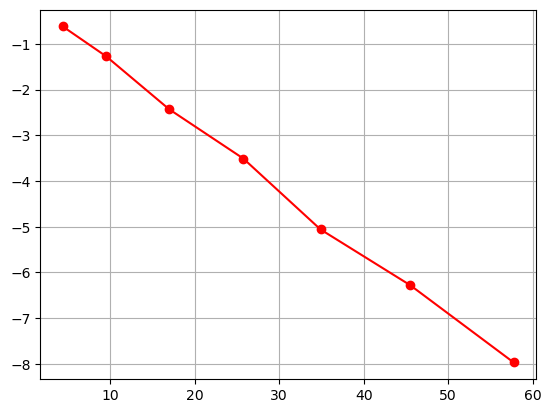

In [ ]:
# x = [34.86,45.53,57.833]
# y = [-4.94,-6.3393,-7.683]
x= [4.38,9.53,16.966,25.755,34.886,45.508,57.75]
y = [-0.62,-1.275,-2.43,-3.51,-5.06,-6.2806,-7.9708]
import matplotlib.pyplot as plt
plt.plot(x,y,"-or")
# plt.xlabel('Expected number of samples')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
print(np.log(1/291))

-5.673323267171493
